In [4]:
import pandas as pd

import scipy as sc
from scipy.io import loadmat

import numpy as np

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import polynomial_kernel

from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(123)

In [5]:
import util
from util import *

In [6]:
reload(util)

<module 'util' from 'util.pyc'>

## Prepare

1. Features: 
   - kernel of all features
   - kernel of each feature
   - gaussian, polynomial
   
2. Features preprocessing:
   - normalization of the features
   - spherical normalization of kernel matrices
   
3. levels of sparsity


# Read Data

### Breast Data

In [7]:
reload(util)

X_breast, y_breast = util.get_breast_data()
X_breast = util.preprocess_feats(X_breast)


N = int(X_breast.shape[0]*.75)

K_breast = util.get_kernels(X_breast, poly=True, feat_kernel=True, gauss=True, max_poly_deg=2, max_gauss_width=4)
K_breast = util.preprocess_kernel(K_breast)

K, K_test = K_breast[:,:N,:N],K_breast[:,N:,:N]
y, y_test = y_breast[:N], y_breast[N:]

In [8]:
K.shape

(310, 426, 426)

# BEMKL

- Sparsity: #chosen kernels
- Running time: 
- Accuracy:

# Non-Sparse

In [9]:
import bemkl_binary

clf = bemkl_binary.BEMKL(sparse=True)

clf.bemkl_binary(K,y)

pred, prob = clf.predict(K_test)

print 'Accuracy:'
(pred==y_test).sum()*1./y_test.shape[0]

Accuracy:


0.9790209790209791

In [7]:
mu_b_e_sp = clf.mu_b_e

In [71]:
mu_b_e_nsp = clf.mu_b_e

In [73]:
(mu_b_e_nsp**2).sum(), (mu_b_e_sp**2).sum()

(0.37081521918435234, 0.30582080681700247)

In [81]:
(mu_b_e_nsp<1e-5).sum()

6

In [91]:
map(lambda x: 2.**x, np.arange(-3,7))

[0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 145.,  55.,  22.,   8.,
          6.,  10.,   4.,   3.,   2.,   5.,   1.,   0.,   0.,   1.,   0.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   1., 

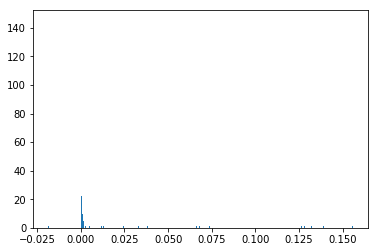

In [10]:
plt.(mu_b_e_sp,bins=1000)